# ***0. introduction*** **

this repo contains the env setting for running the agent code in colab.

## **0.1 package installation and other pre-work**

### *0.1.1 Package Installation*

In [ ]:
!pip install python-dotenv
!pip install langgraph
!pip install langgraph.checkpoint.sqlite
!pip install langchain_openai
!pip install tavily-python
# install pygraphviz for visualization of the agent graph
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install langchain_community
!pip install langchain_chroma
!pip install langchain
!pip install langchain.text_splitters
!pip install pypdf
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.8/454.8 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.5 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.57.4
    Uninstalling openai-1.57.4:
      Successfully uninstalled openai-1.57.4
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libgail-common libgail18 libgtk2

### *0.2 enable API key in colab is different than implement it in local env*

In [ ]:
from google.colab import userdata
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
import os
from tavily import TavilyClient

In [ ]:
# userdata.get('OPENAI_API_KEY')
# userdata.get('TAVILY_API_KEY')

model = ChatOpenAI(model="gpt-3.5-turbo", api_key = userdata.get('OPENAI_API_KEY'),  temperature=0)
tavily = TavilyClient(api_key=userdata.get('TAVILY_API_KEY'))

In [ ]:
if not os.environ.get("TAVILY_API_KEY"):
    os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

tavily_tool = TavilySearchResults(max_results=5)

if not os.environ.get("OPENAI_API_KEY"):
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

### *** 0.3 import libraries***

In [ ]:
import os
from typing import List, Literal
from typing_extensions import TypedDict

# LangChain / LangGraph / etc.
from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_chroma import Chroma
from langchain_core.documents import Document
from langchain_community.document_loaders import PyPDFLoader, Docx2txtLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_core.messages import HumanMessage, BaseMessage
from langgraph.graph import MessagesState, START, END, StateGraph
from langgraph.types import Command
from langgraph.prebuilt import create_react_agent
from langgraph.prebuilt.tool_node import ToolNode, tools_condition
from langgraph.prebuilt.tool_executor import ToolExecutor
import random
from typing import List, Literal
from typing_extensions import TypedDict
from langchain.tools import tool
from pydantic import BaseModel
from langchain_core.runnables import RunnablePassthrough

from langchain_core.messages import BaseMessage, AIMessage, SystemMessage  # if you need these
from typing import List, Literal, Dict, Any,Annotated

from dataclasses import dataclass, field
import operator
from langchain.prompts.chat import ChatPromptTemplate

### ***0.4. enable llm and tavily tool***

In [ ]:
model = ChatOpenAI(
    model="gpt-4o-2024-08-06",
    api_key=os.environ.get("OPENAI_API_KEY"),
    temperature=0
)

# Example search tool
tavily_tool = TavilySearchResults(max_results=5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

folder_path = "/content/drive/MyDrive/Agent_study/Multi-Agent_Supervisor/examples/example_with_RAG/rag_memory/"

Mounted at /content/drive


#1.Create sub Agents

# ***1. Create Agent State*** **





In [ ]:
from typing import TypedDict, Annotated, List, Dict, Any
from dataclasses import dataclass, field
import operator


class AgentState(TypedDict):
  # modify the data structure that your Agent would like to access


#***2. Create Agent*** **

In [ ]:
# modify the sub agent of your agent system, here is an example
members = ["Hyperparameter_tunner", "Training_implementor", "converage_analysor", "FINISH" ]

##**2.1 Supervisor Agent** ::)

###*2.1.1. Supevisor_prompt*

In [ ]:
SUPERVISOR_PROMPT = (
    "You are a supervisor who manages the conversation among these workers: "
    f"{members}. Decide which worker to call next based on the context. "
    "If we are done, respond with FINISH."
)

###*2.1.2 Supe_node*

In [ ]:
def supervisor_node(state: AgentState) -> Command[Literal["Hyperparameter_tunner",
                                                          "Training_implementor",
                                                          "converage_analysor",
                                                          "__end__"]]:
  pass

##**2.2  Hyperparameter_agent** ::)

###*2.2.1 Hyp_prompt*

In [ ]:
HYPERPARAMETER_TUNNER_PROMPT =     """
  You are a professional Deep Neural Network model impletmenting reserach. \
  You are very professional on the hyperparameter tunning tasks of DNN model.\
  You will check the performance of last trained DNN model in terms of the change of training_loss and validation_loss\
  changed with increasing epoch. You also able to check the final training_accuracy and the testing accuracy. \

  If the user provides model performance analysis, you consider such analysis and change the hyperparameters accorddingly, \
  aims to train the model better. \


  Utilize all the information below as needed: \
  -----
  {hyperparams}
  {train_loss}
  {val_loss}
  {train_acc}
  {val_acc}
  {epoch}
  {analysis_decision}

  ---
  After thinking, you will adjust the {hyperparams}, and return a new set of hyperparameters. \
  You will return it in a JSON format. \
  ---
  Example output:
  {
    "hyperparameters": {
      "Neurons_per_hidden_layer": 128,
      "Number_of_hidden_layer": 3,
      "Activation_functions": "ReLU",
      "Weight_decay_value": 1e-4,
      "Learning_rate_value": 0.001,
      "Dropout_rate_value": 0.3,
      "Batch_size_value": 32,
      "Criterion": "CrossEntropyLoss",
      "Early_stop_patience": 5
    }
  }
  """

###*2.2.2 Hyper_node*

In [ ]:
def Hyperparameter_tunner(state: AgentState) -> Command[Literal["SupervisorNode"]]:
  pass

  message = {
      system_message = HYPERPARAMETER_TUNNER_PROMPT,
      human_message = ___
  }

  response = llm.invoke (message)

  return {response} # the returned response need have some format, need connnected with system memory (AgentState)

##**2.3. Training Agent** ::)

###*2.3.1 Training_prompt*

In [ ]:
TRAINING_PROMPT =     """
  pass
  """

###*2.3.2Training_Agent*

In [ ]:
def mock_train_for_epochs(hparams: Dict[str, Any], start_epoch: int=1, epochs: int=5):
    """
    Mocks training for 'epochs' more epochs, returning a list of records:
    [
      {"epoch": 1, "train_loss":..., "val_loss":..., "train_acc":..., "val_acc":...},
      {"epoch": 2, "train_loss":..., ...},
      ...
    ]
    """
    results = []
    for i in range(epochs):
        e = start_epoch + i
        train_loss = round(random.uniform(0.1, 1.0), 3)
        val_loss   = round(random.uniform(0.1, 1.0), 3)
        train_acc  = round(random.uniform(0.5, 1.0), 3)
        val_acc    = round(random.uniform(0.5, 1.0), 3)
        results.append({
            "epoch": e,
            "train_loss": train_loss,
            "val_loss": val_loss,
            "train_acc": train_acc,
            "val_acc": val_acc
        })
    return results

def Training_implementor(state: AgentState) -> Command[Literal["SupervisorNode"]]:
  pass

##**2.4. converge_analysor Agent** ::)

###*2.4.1.Converge_analysor Prompt*

In [ ]:
ANALYSIS_PROMPT = """
  PASS
  """

### *2.4.2 Converge_analysor Agent*



In [ ]:
def converage_analysor(state: AgentState) -> Command[Literal["SupervisorNode"]]:
  pass

# ***3. Build Graph*** **

In [ ]:
builder = StateGraph(AgentState)
builder.add_node("SupervisorNode", supervisor_node)
builder.add_node("Hyperparameter_tunner", Hyperparameter_tunner)
builder.add_node("Training_implementor", Training_implementor)
builder.add_node("converage_analysor", converage_analysor)
builder.add_edge(START, "SupervisorNode")
graph = builder.compile()

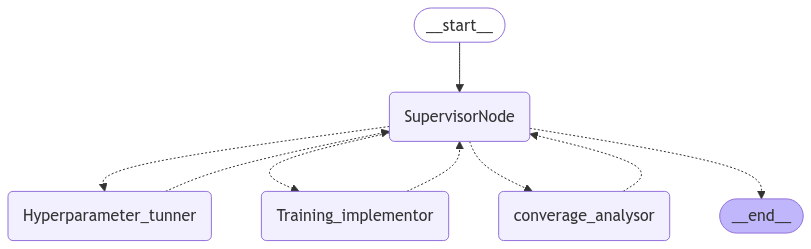

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # You can put your exception handling code here
    pass

## **4. Example Usage** ::)